<a href="https://colab.research.google.com/github/ArMiarintsoa/poketrafinday-ispm-examen/blob/main/poketrafinday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation de dataset

Importation du dataset depuis une URL GitHub

In [1]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/ArMiarintsoa/poketrafinday-ispm-examen/refs/heads/main/train.csv"
test_url = "https://raw.githubusercontent.com/ArMiarintsoa/poketrafinday-ispm-examen/refs/heads/main/test.csv"
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

Affiche les 5 premières lignes du dataset pour vérifier la structure et le contenu

In [2]:
train_df.head()

,transaction_id,step,type,amount,customer_id,age,is_fraud
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0


In [3]:
total_NA_train = train_df.isna().sum()
total_NULL_train = train_df.isnull().sum()
total_NA_test = test_df.isna().sum()
total_NULL_test = test_df.isnull().sum()
print("\nTotal NAN train:\n",total_NA_train)
print("\nTotal NULL train:\n",total_NULL_train)
print("\nTotal NAN test:\n",total_NA_test)
print("\nTotal NULL test:\n", total_NULL_test)


Total NAN train:
 transaction_id    0
step              0
type              0
amount            0
customer_id       0
age               0
is_fraud          0
dtype: int64

Total NULL train:
 transaction_id    0
step              0
type              0
amount            0
customer_id       0
age               0
is_fraud          0
dtype: int64

Total NAN test:
 transaction_id    0
step              0
type              0
amount            0
customer_id       0
age               0
dtype: int64

Total NULL test:
 transaction_id    0
step              0
type              0
amount            0
customer_id       0
age               0
dtype: int64


Encoder le type

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
enc = le.fit_transform(train_df['type'])
train_df['type_encoded'] = enc
enc = le.fit_transform(test_df['type'])
test_df['type_encoded'] = enc
train_df.head()

,transaction_id,step,type,amount,customer_id,age,is_fraud,type_encoded
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0,2
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0,2
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0,2
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0,3
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0,0


Encoder le customer_id

In [5]:
train_df = train_df.drop(['transaction_id','type', 'customer_id'], axis=1)
test_df = test_df.drop(['transaction_id','type', 'customer_id'], axis=1)

In [6]:
train_df.head()

,step,amount,age,is_fraud,type_encoded
0,421,311000,24,0,2
1,325,399600,25,0,2
2,565,7500,38,0,2
3,511,94000,26,0,3
4,63,15000,26,0,0


# EDA

Correlation entre les variables

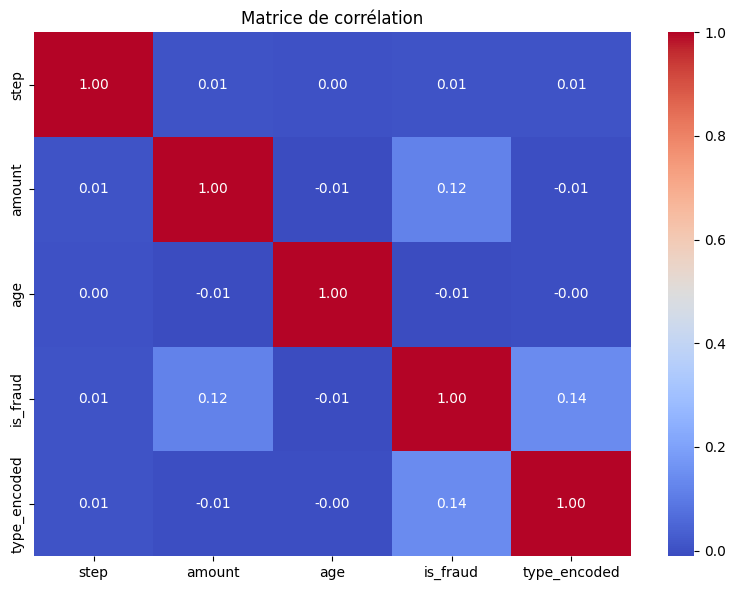

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
variables = ['step', 'amount',	'age',	'is_fraud',	'type_encoded']

# Histogrammes
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[variables].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

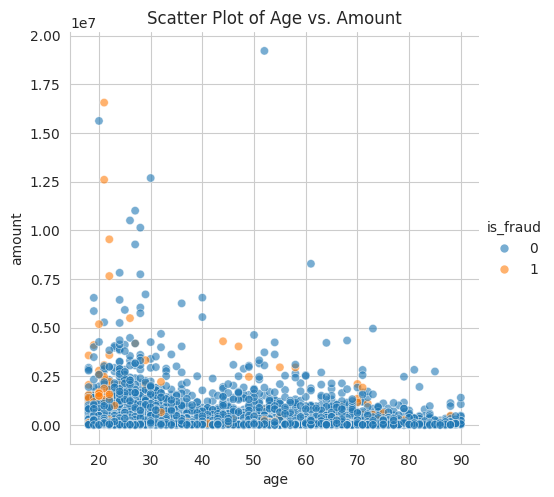

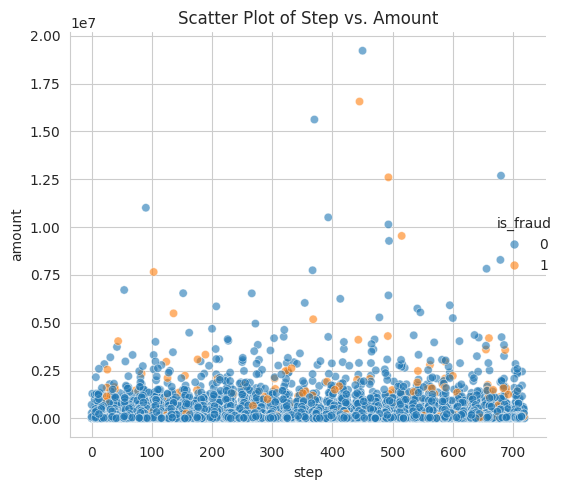

In [8]:
# Définir le style pour une meilleure lisibilité
sns.set_style("whitegrid")

# Création de la figure et des axes
plt.figure(figsize=(10, 6))

sns.relplot(x='age', y='amount', data=train_df, alpha=0.6, hue='is_fraud')
plt.title('Scatter Plot of Age vs. Amount')

sns.relplot(x='step', y='amount', data=train_df, alpha=0.6, hue='is_fraud')
plt.title('Scatter Plot of Step vs. Amount')

plt.tight_layout()
plt.show()

# Baseline (Régression Logistique)

Préparation de données

In [9]:
train_df.head()

,step,amount,age,is_fraud,type_encoded
0,421,311000,24,0,2
1,325,399600,25,0,2
2,565,7500,38,0,2
3,511,94000,26,0,3
4,63,15000,26,0,0


In [10]:
from sklearn.model_selection import train_test_split

# Séparer la variable cible
y = train_df["is_fraud"]

# Features à garder
X = train_df.drop(columns=["is_fraud"])

# Split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train


,step,amount,age,type_encoded
11136,635,29500,33,0
14707,203,371000,53,1
15569,179,30000,20,1
24385,14,352000,28,2
18736,232,161000,25,0
...,...,...,...,...
22865,584,159200,29,0
7290,369,49800,28,2
12577,584,65400,65,2
4284,323,378000,25,2


Préparation du modèle

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [12]:
# Création du modèle
logreg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",  # important si les fraudes sont rares
    random_state=42
)

In [13]:
# Entraînement
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [14]:
# Prédictions
y_pred = logreg.predict(X_test)

In [15]:
# Scores
print("=== F1-Score ===")
print(f1_score(y_test, y_pred))

print("\n=== Rapport Classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de Confusion ===")
print(confusion_matrix(y_test, y_pred))

# Rapport sur les fraudes détectées
fraud_report = X_test.copy()
fraud_report["y_true"] = y_test.values
fraud_report["y_pred"] = y_pred
fraud_report = fraud_report[fraud_report["y_pred"] == 1]  # Fraudes détectées

print("\n=== Rapport sur les fraudes détectées ===")
print(fraud_report.head(20))

=== F1-Score ===
0.1178343949044586

=== Rapport Classification ===
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      5881
           1       0.06      0.93      0.12       119

    accuracy                           0.72      6000
   macro avg       0.53      0.83      0.48      6000
weighted avg       0.98      0.72      0.82      6000


=== Matrice de Confusion ===
[[4227 1654]
 [   8  111]]

=== Rapport sur les fraudes détectées ===
       step   amount  age  type_encoded  y_true  y_pred
23894   635    33600   26             3       0       1
12710   303  4189500   27             3       0       1
12049   422    48700   22             3       0       1
668     657   270700   26             3       0       1
25460   401   486000   21             2       0       1
18072   121   597000   55             3       1       1
25495   162    32500   35             3       0       1
17990   249    21500   61             3       0       1
1

# Exploration et modélisation

In [16]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [17]:
customer_counts = train_df.groupby('customer_id')['transaction_id'].count().reset_index()
customer_counts.columns = ['customer_id', 'nb_total_transactions']

# 2. Fusionner cette nouvelle feature au DataFrame
df = train_df.merge(customer_counts, on='customer_id', how='left')

# 3. Calculer l'activité moyenne par client (Montant moyen)
# Cette feature pourrait aider à normaliser l'activité.
avg_amount_by_customer = df.groupby('customer_id')['amount'].mean().reset_index()
avg_amount_by_customer.columns = ['customer_id', 'avg_amount_customer']
df = df.merge(avg_amount_by_customer, on='customer_id', how='left')

# 4. Créer une Feature d'anomalie :
# Calculer l'écart du montant actuel par rapport à la moyenne du client
df['amount_vs_avg_customer'] = df['amount'] - df['avg_amount_customer']
# Une grande valeur (positive ou négative) indique une transaction inhabituelle pour ce client.

In [18]:
# 1. Dériver le jour de la semaine ou de la période (si 'step' est basé sur des unités de temps)
# Si 'step' représente des heures, on peut extraire l'heure de la journée (modulo 24)
df['hour_of_day'] = df['step'] % 24
# La fraude peut être plus fréquente la nuit (faible surveillance) ou aux heures de pointe.

# 2. Créer une Feature pour détecter l'activité en week-end/jour de semaine
# Si le dataset couvre une période donnée, on peut approximer la semaine
# Exemple : Si 1 'step' est une heure, alors 168 steps = 1 semaine (7*24)
# Cette feature permet de détecter des cycles hebdomadaires
df['is_weekend'] = (df['step'] % 168 >= 144).astype(int) # Exemple d'approximation

# 3. Supprimer les features ID si elles n'ont plus d'utilité après l'ingénierie
df.drop(['customer_id', 'transaction_id'], axis=1, inplace=True)

# Random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Assurez-vous d'avoir refait la séparation X_train/X_test avec les nouvelles features
# ... (Code de pré-traitement et séparation X_train/X_test ici) ...

# 1. Initialiser le modèle
# n_estimators: Nombre d'arbres
# class_weight='balanced': Aide à gérer le déséquilibre de classes (donne plus de poids aux fraudes)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)

# 2. Entraîner le modèle
rf_model.fit(X_train, y_train)

# 3. Évaluer
y_pred_rf = rf_model.predict(X_test)
print("\n--- RÉSULTATS DU MODÈLE RANDOM FOREST ---")
print(classification_report(y_test, y_pred_rf))
print("Accuracy globale:", f1_score(y_test, y_pred_rf))

# 4. Afficher l'importance des Features (clé pour l'interprétabilité)
# Cela vous dira quelles sont les nouvelles features les plus pertinentes
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print("\nTop 5 des Features Importantes:")
print(feature_importances.nlargest(5))


--- RÉSULTATS DU MODÈLE RANDOM FOREST ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5881
           1       0.86      0.61      0.72       119

    accuracy                           0.99      6000
   macro avg       0.93      0.81      0.86      6000
weighted avg       0.99      0.99      0.99      6000

Accuracy globale: 0.7156862745098039

Top 5 des Features Importantes:
amount          0.471621
type_encoded    0.329473
step            0.114402
age             0.084503
dtype: float64


# XGBoost

In [20]:
from xgboost import XGBClassifier

# 1. Initialiser le modèle
# scale_pos_weight: Très important pour le déséquilibre. Il doit être = (Nb de non-fraudes / Nb de fraudes)
# Calculez ce ratio à partir de votre ensemble d'entraînement 'y_train'
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=ratio, # Gestion du déséquilibre
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# 2. Entraîner le modèle
xgb_model.fit(X_train, y_train)

# 3. Évaluer
y_pred_xgb = xgb_model.predict(X_test)
print("\n--- RÉSULTATS DU MODÈLE XGBOOST ---")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy globale:", f1_score(y_test, y_pred_xgb))


--- RÉSULTATS DU MODÈLE XGBOOST ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5881
           1       0.33      0.79      0.46       119

    accuracy                           0.96      6000
   macro avg       0.66      0.88      0.72      6000
weighted avg       0.98      0.96      0.97      6000

Accuracy globale: 0.4630541871921182


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:50:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialiser le modèle
# class_weight='balanced': Essentiel pour gérer le déséquilibre de classes.
# max_depth: Limiter la profondeur pour éviter le surapprentissage (overfitting).
dt_model = DecisionTreeClassifier(
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

# 2. Entraîner le modèle
# Le Decision Tree apprend les règles à partir des données d'entraînement.
dt_model.fit(X_train, y_train)

# 3. Faire des prédictions
y_pred_dt = dt_model.predict(X_test)

# 4. Évaluation
print("\n--- RÉSULTATS DU MODÈLE ARBRE DE DÉCISION ---")
print("Accuracy globale:", f1_score(y_test, y_pred_dt))
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred_dt))


--- RÉSULTATS DU MODÈLE ARBRE DE DÉCISION ---
Accuracy globale: 0.3291592128801431

Rapport de Classification :
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5881
           1       0.21      0.77      0.33       119

    accuracy                           0.94      6000
   macro avg       0.60      0.86      0.65      6000
weighted avg       0.98      0.94      0.95      6000



In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1. Mise à l'échelle (Standardization)
# On utilise StandardScaler pour centrer les données autour de zéro et les réduire à une variance unitaire.
scaler = StandardScaler()

# 2. Création d'un Pipeline
# Le pipeline applique le scaling puis le classifieur.
# C'est la façon la plus propre de gérer le pré-traitement et le modèle ensemble.
mlp_model = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(50, 20), # 2 couches cachées avec 50 et 20 neurones
        max_iter=500,                # Nombre maximum d'itérations
        activation='relu',           # Fonction d'activation ReLU
        random_state=42,
        solver='adam'
    ))
])

# 3. Entraîner le modèle
# Le pipeline s'occupe automatiquement du scaling sur X_train
mlp_model.fit(X_train, y_train)

# 4. Faire des prédictions
# Le pipeline s'occupe automatiquement du scaling sur X_test avant la prédiction
y_pred_mlp = mlp_model.predict(X_test)

# 5. Évaluation
print("\n--- RÉSULTATS DU MODÈLE RÉSEAU DE NEURONES (MLP) ---")
print("Accuracy globale:", f1_score(y_test, y_pred_mlp))
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred_mlp))


--- RÉSULTATS DU MODÈLE RÉSEAU DE NEURONES (MLP) ---
Accuracy globale: 0.03225806451612903

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5881
           1       0.40      0.02      0.03       119

    accuracy                           0.98      6000
   macro avg       0.69      0.51      0.51      6000
weighted avg       0.97      0.98      0.97      6000



In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import pandas as pd # Assurez-vous d'avoir toujours vos données dans des DataFrames

# --- 1. DÉFINITION DE LA GRILLE DE PARAMÈTRES ---

# Définir les hyperparamètres et les valeurs que nous souhaitons tester.
param_grid = {
    'n_estimators': [100, 200, 300], # Nombre d'arbres dans la forêt.
    'max_depth': [10, 20, None],     # Profondeur maximale de chaque arbre (None = illimitée).
    'min_samples_split': [2, 5],     # Nombre minimum d'échantillons requis pour scinder un nœud interne.
    'min_samples_leaf': [1, 5]       # Nombre minimum d'échantillons requis pour être à un nœud feuille.
}

# --- 2. INITIALISATION DE LA RECHERCHE PAR GRILLE ---

# Créer l'objet GridSearchCV
# estimator: Le modèle que nous optimisons.
# scoring='recall': IMPORTANT ! Optimiser le Rappel (Recall) pour la classe 1 (Fraude).
# cv=5: Utiliser 5 plis de validation croisée.
# n_jobs=-1: Utiliser tous les cœurs du processeur pour accélérer le calcul.

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(
        random_state=42,
        class_weight='balanced' # Utiliser le poids de classe pour gérer le déséquilibre
    ),
    param_grid=param_grid,
    scoring='recall', # La métrique à maximiser (le Rappel de la fraude)
    cv=5,
    verbose=2, # Afficher les logs du processus
    n_jobs=-1
)

# --- 3. LANCEMENT DE LA RECHERCHE ---

# Lancer la recherche par grille sur l'ensemble d'entraînement.
# ATTENTION : Cette étape peut être très longue selon la taille de X_train et de la grille.
print("Lancement de la recherche par grille...")
grid_search.fit(X_train, y_train)

# --- 4. AFFICHAGE DES RÉSULTATS ---

print("\n--- RÉSULTATS DE LA RECHERCHE PAR GRILLE ---")
print("Meilleurs hyperparamètres trouvés:", grid_search.best_params_)
print("Meilleur score de Rappel (Validation Croisée):", grid_search.best_score_)

# --- 5. ÉVALUATION DU MEILLEUR MODÈLE ---

# Récupérer le meilleur modèle trouvé par la recherche
best_rf_model = grid_search.best_estimator_

# Faire des prédictions sur le jeu de test (non vu)
y_pred_best = best_rf_model.predict(X_test)

print("\n--- ÉVALUATION FINALE DU MEILLEUR MODÈLE ---")
print("Rapport de Classification sur le jeu de test:")
print(classification_report(y_test, y_pred_best))

Lancement de la recherche par grille...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- DÉFINITION DES MEILLEURS PARAMÈTRES ---
best_params = {
    'max_depth': 20,
    'min_samples_leaf': 1,
    'n_estimators': 200
}

# --- 1. INITIALISATION DU MODÈLE FINAL ---

# Créer le modèle Random Forest en utilisant les meilleurs paramètres trouvés.
# On conserve 'class_weight="balanced"' et 'random_state=42' pour la cohérence.
final_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    class_weight='balanced', # Crucial pour le déséquilibre
    random_state=42,
    n_jobs=-1 # Utiliser tous les cœurs pour l'entraînement
)

# --- 2. ENTRAÎNEMENT DU MODÈLE ---
print("Entraînement du modèle Random Forest final...")
final_rf_model.fit(X_train, y_train)

# --- 3. PRÉDICTION ET ÉVALUATION ---

# Prédictions sur l'ensemble de test
y_pred_final = final_rf_model.predict(X_test)

print("\n--- PERFORMANCE FINALE DU RANDOM FOREST OPTIMISÉ ---")
print("Accuracy (Précision globale) :", f1_score(y_test, y_pred_final))
print("\nMatrice de Confusion :")
print(confusion_matrix(y_test, y_pred_final))
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred_final))

Entraînement du modèle Random Forest final...

--- PERFORMANCE FINALE DU RANDOM FOREST OPTIMISÉ ---
Accuracy (Précision globale) : 0.7156862745098039

Matrice de Confusion :
[[5869   12]
 [  46   73]]

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5881
           1       0.86      0.61      0.72       119

    accuracy                           0.99      6000
   macro avg       0.93      0.81      0.86      6000
weighted avg       0.99      0.99      0.99      6000

